In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# For solving question 4
from itertools import combinations
from collections import Counter

### Merging 12 months of sales into a single file

In [14]:
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('./Output/all_data.csv', index = False)


In [54]:
all_months_data = pd.read_csv('./Output/all_data.csv')
all_months_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean up the data!!

In [17]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)]
nan_df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# We figured out rows contains NaN values are all NaNs. So we drop with all
all_months_data = all_months_data.dropna(how='all')

### Get rid of text in order date column

In [11]:
# There are months that are not in the right formatb
all_months_data[all_months_data['Order Date'].str[0:2] == 'Or']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [56]:
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2] != 'Or']

In [51]:
all_months_data['Product'].value_counts()


USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

### Make columns to correct type

In [57]:
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])
all_months_data['Quantity Ordered'] = pd.to_numeric(
    all_months_data['Quantity Ordered'])


### Question 1: What was the best month sales? How much was earned that month?

#### Create month column

In [14]:

all_months_data['Month'] = all_months_data['Order Date'].str[0:2]
all_months_data['Month'] = all_months_data['Month'].astype('int32')
# all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### Add sales column

In [6]:
sales = all_months_data['Quantity Ordered'] * all_months_data['Price Each']

In [7]:
all_months_data.insert(loc=4, column='Sales', value=sales)
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [9]:
each_month = all_months_data.groupby(by='Month')

In [10]:
total_sales_each_month = each_month[['Quantity Ordered', 'Sales']].sum()
total_sales_each_month

,Quantity Ordered,Sales
Month,,
1,10903,1822256.73
2,13449,2202022.42
3,17005,2807100.38
4,20558,3390670.24
5,18667,3152606.75
6,15253,2577802.26
7,16072,2647775.76
8,13448,2244467.88
9,13109,2097560.13


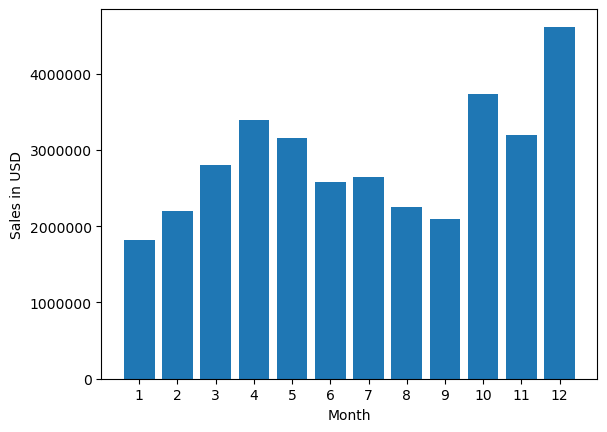

In [35]:
months = range(1, 13)
plt.bar(months, total_sales_each_month['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


### Question 2: What city has the highest of sales

#### Task 1: Add city column with code since there are many cities have the same names (Ex: Portland in US and Portland in England)

In [31]:
def get_city(address):
    return address.split(',')[1]

def get_code(address):
    return address.split(',')[2].split()[0]

city = all_months_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_code(x)})')

In [32]:
all_months_data.insert(loc = 7, column = 'City', value = city)
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX),4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA),4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Los Angeles (CA),9
186846,259354,iPhone,1,700.00,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco (CA),9
186847,259355,iPhone,1,700.00,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",San Francisco (CA),9
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",San Francisco (CA),9


#### Group by city, sum then sort the values

In [33]:
group_by_city = all_months_data.groupby('City')

In [38]:
# Notice the Portland (ME) and Portland (OR)!!
total_sales_by_city = group_by_city.sum(numeric_only=True)
total_sales_by_city


,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Portland (ME),2750,447189.25,449758.27,17144
Portland (OR),11303,1860558.22,1870732.34,70621
San Francisco (CA),50239,8211461.74,8262203.91,315520


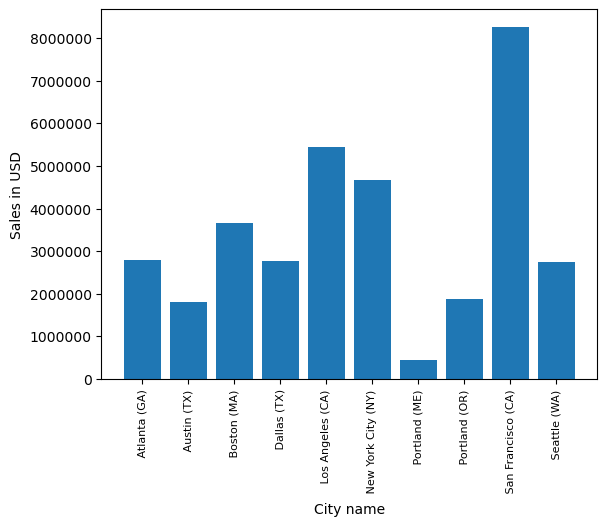

In [39]:
# Cities array must be the same order when we group by!
cities = [city for city, df in all_months_data.groupby('City')]
plt.bar(cities, total_sales_by_city['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City name')
plt.ylabel('Sales in USD')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


### Question 3: What time should we run advertisement to maximize customer buying the product?

#### Add hour column

In [13]:
hour = all_months_data['Order Date'].dt.hour

In [14]:
all_months_data.insert(loc = 6, column='Hour', value=hour)

#### Draw bar chart with plt

In [50]:
# Count number of rows in each hour since we count by number of guests not the sales!
# Since we count the views!
hour_count = all_months_data.groupby('Hour').count()
hour_count


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Month
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [72]:
plt.style.use('classic')


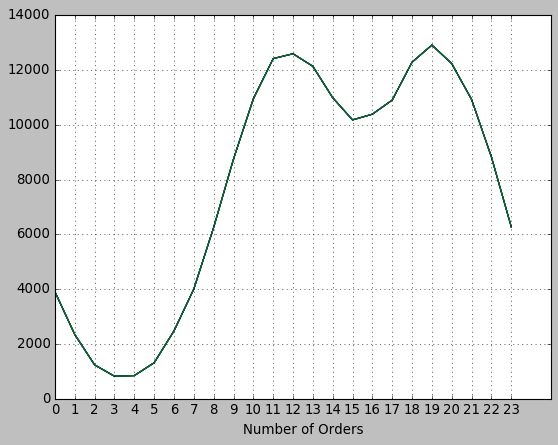

In [73]:
hours = [hour for hour, data in all_months_data.groupby('Hour')]
plt.plot(hours, hour_count)
plt.xticks(hours)
plt.xlabel('Hour')
plt.xlabel('Number of Orders')
plt.grid()
plt.show()

### Question 4: What products are most often sold together

In [14]:
# keep = False means keep all duplicates
bought_together_df = all_months_data[all_months_data['Order ID'].duplicated(keep=False)].copy()
bought_together_df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4
...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9
186803,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9
186804,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9
186841,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9


#### Combine the product name with the same order ID

In [15]:
bought_together_df['Grouped'] = bought_together_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

#### Drop duplicates and only takes Order ID and Grouped column

In [16]:
bought_together_df = bought_together_df[['Order ID', 'Grouped']].drop_duplicates()
bought_together_df

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
186783,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
186791,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [19]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
count_2 = Counter()

for row in bought_together_df['Grouped']:
    row_list = row.split(', ')
    # Count the pair 2 products combination
    count_2.update(Counter(combinations(row_list, 2)))
    
for key, value in count_2.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [20]:
count_3 = Counter()

for row in bought_together_df['Grouped']:
    row_list = row.split(', ')
    # Count the pair 2 products combination
    count_3.update(Counter(combinations(row_list, 3)))

for key, value in count_3.most_common(10):
    print(key, value)


('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### Question 5: What product sold the most? Why?

In [58]:
product_group = all_months_data.groupby('Product')


C:\Users\DELL\AppData\Local\Temp\ipykernel_12768\3619153621.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=products, rotation='vertical', size=8)


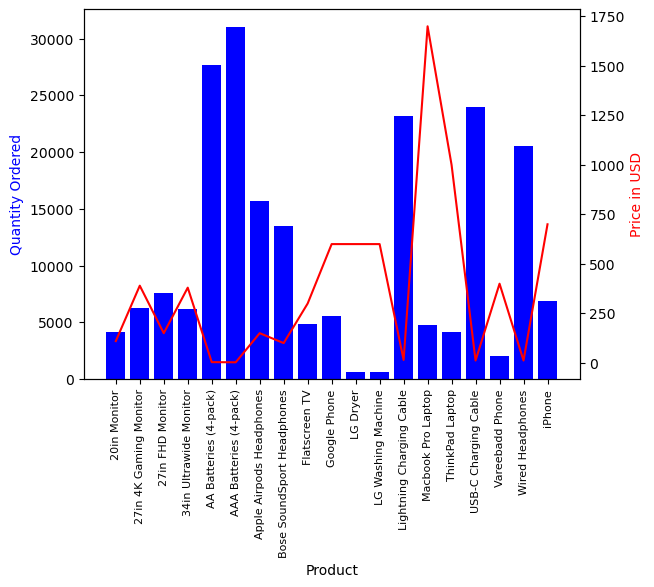

In [59]:
products = [product for product, df in product_group]
quantities = product_group['Quantity Ordered'].sum(numeric_only=True)
prices = product_group['Price Each'].mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantities, color='b')
ax2.plot(products, prices, 'r')

ax1.set_xlabel('Product')
ax1.set_xticklabels(labels=products, rotation='vertical', size=8)
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price in USD', color='r')

plt.show()
